# Monte Carlo Methods

This exercise address the use of “random” numbers in Monte Carlo techniques and makes use the random number routines included in numpy.random :
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

This library uses the "Mersenne Twister" algorithm internally, which is a modern, well behaved, pseudo-random number generator. Note that, by default, the generator will be initialised with a "seed" based on the time when the programme is started - giving a different sequence of numbers every time you run the programme.

### 1a)
In this first exercise I generate random angles $\theta$, between 0 and $\pi$, with a probability distribution which is proportional to ${\rm sin}(\theta)$. The first routine is based on an analytical method and the another uses the accept/reject method.

In [14]:
import numpy as np

def Analytic(n):
    """Produces random numbers between zero and two pi, with a sine distribution.
    Inputs: The number of random numbers you wish to generate.
    Returns: The list of random numbers."""
    a = 1/2
    c = 1/np.pi
    x = np.pi*np.random.random(int(n))
    x_ = np.arccos(1-c*x/a) 
    return x_

def Accept_reject(n):
    """Produces random numbers between zero and two pi, with a sine distribution.
    Inputs: The number of random numbers you wish to generate.
    Returns: The list of random numbers."""
    a = 1/2
    c = 1/np.pi
    m = a/c
    theta_ = []
    def p(x):
        return a*np.sin(x)
    while len(theta_)<n:    
        z = np.random.uniform(0, np.pi)
        u = np.random.uniform(0, 1)
        if u <= (p(z))/(m*c):
            theta_.append(z)
    return theta_


### 1b)
Next I verify that the two routines produce the desired distribution, and evaluate their performance (in both cpu terms and accuracy). A discussion of the results is given in the text cell below.

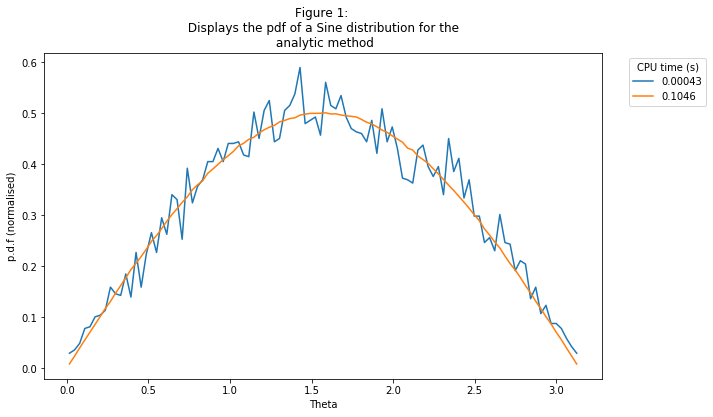

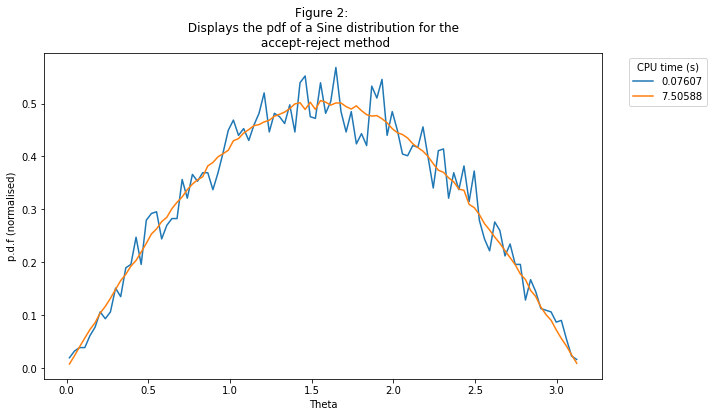

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings("ignore")

t1_0 = time.time()     #Calls and times the analytic method.
x_1 = [Analytic(1e4)]
t1_1 = time.time()
t1 = round(t1_1 - t1_0,5)

t2_0 = time.time()     #Calls and times the analytic method again for a larger sample size.
x_2 = [Analytic(1e7)]
t2_1 = time.time()
t2 = round(t2_1 - t2_0,5)

plt.figure(figsize=(10,6))           #Plots the pdf of the analytic method using histograms.
hist_1, bins = np.histogram(x_1, bins=100,normed = True)
hist_2, bins = np.histogram(x_2, bins=100,normed = True)
bin_centers = (bins[1:]+bins[:-1])*0.5
one, = plt.plot(bin_centers, hist_1,label=t1)
two, = plt.plot(bin_centers, hist_2,label=t2)
plt.legend(handles=[one,two],title="CPU time (s)",bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Figure 1: \n Displays the pdf of a Sine distribution for the \n analytic method' )
plt.ylabel('p.d.f (normalised)')
plt.xlabel('Theta')
plt.show()

ta1_0 = time.time()     #Calls and times the accept-reject method.
a_1 = [Accept_reject(1e4)]
ta1_1 = time.time()
ta1 = round(ta1_1 - ta1_0,5)

ta2_0 = time.time()     #Calls and times the accept-reject method again for a larger sample size.
a_2 = [Accept_reject(1e6)]
ta2_1 = time.time()
ta2 = round(ta2_1 - ta2_0,5)

plt.figure(figsize=(10,6))            #Plots the pdf of the accept-reject method using histograms.
hist_a1, bins = np.histogram(a_1, bins=100, normed=True)
hist_a2, bins = np.histogram(a_2, bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
one_a, = plt.plot(bin_centers, hist_a1, label = ta1)
two_a, = plt.plot(bin_centers, hist_a2, label = ta2)
plt.legend(handles=[one_a,two_a],title="CPU time (s)",bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Figure 2: \n Displays the pdf of a Sine distribution for the \n accept-reject method' )
plt.ylabel('p.d.f (normalised)')
plt.xlabel('Theta')
plt.show()


warnings.filterwarnings("ignore")

The above functions generate random numbers with the desired sine distributions by both the analytic and accept-reject methods. 

The analytic method functions by initially generating random numbers between zero and one from a numpy.random.uniform distribution. These numbers are then used as the argument in the inverse equation, which is generated by equating the integrated pdf's of the uniform and sine distributions. The resulting random numbers have the desired sine distribution.

The accept-reject method functions by generating two sets of uniformly distributed random numbers. One set, z, is between zero and one from a numpy.random.uniform distribution and the other, u, is between zero and two pi; again from a numpy.random.uniform distribution. A function, p(z), with the same form as the desired output pdf, in this case $sine$, is then established. The algorithm then outputs values from the desired sine pdf by generating a number from u and then checking to see if a number generated by p(z) (divided by some normalisation constant) is less than u. Hence, if u < p(z) then z is accepted and will follow the desired sine pdf.

Figures 1 and 2 display the distributions from both methods and the corresponding cpu run times as the sample size is increased. In terms of accuracy, we clearly see in both cases the distributions trending to the desired sine pdf as the sample size is increased. The analytic method displays grater conformity to the sine pdf, for a given run time. This is as expected, due to the reduced complexity in this algorithm. The accept-reject method requires a much longer run time in order to approximate the sine pdf with comparable accuracy. This is again as expected, due to the increased complexity in it's algorithm.

Both methods successfully  reproduce the desired sine pdf; the analytic method with grater efficiency, but the accept-reject method provides an equally reliable end result, whilst being more robust, in that it can generate pdfs where an analytic solution is not available.

## 2 - Statistical Analysis

Here I explore the use of Monte Carlo methods to understand experiment outcomes.

Standard experimental error analysis frequently uses the assumption that uncertainties are normally distributed. The interpretation of a result quoted as $\mu \pm \sigma$ is taken that the true value lies within the range [$(\mu - \sigma$),$(\mu + \sigma)$] with a certain probability (usually 68%). However, it is not hard to find cases where these assumptions break. A classic example occurs when measuring a parameter that is close to a physical boundary - the standard error treatment may result in a range of values that includes the non-physical region.

A more sophisticated approach is to treat the measurement process as an inverse problem, ie. the inference of model parameters from experimental measurements. (For example, estimation of G from observations of planetary motion). Given a model, we can use Monte Carlo techniques to generate ensembles of "pseudo-experiments", and build up distributions of experimental outcomes for a given set of model parameters. Then it is straightforward to find the range of model parameters that cover an actual experimental observation, within a specified probability.

### 2a)

In this exercise a "counting experiment" is performed at a collider to search for the existence of a hypothesised new particle.  The experiment consists of counting the number of events that meet certain criteria. Events can be produced either by the hypothetical signal process, or by known background processes. However, an individual event cannot be ascribed to be signal or background - the only measurable quantity is the _total_ number of events.

Both signal and background processes produce a number of events that is Poisson distributed. The mean number of background events has been estimated to be $4.8 \pm 0.5$.  The mean number of signal events is given by $L \sigma$, where the integrated luminosity $L=10 nb^{-1}$, and $\sigma$ is the (unknown) cross section of the signal process. The number of events observed in the counting experiment is 6.

To modell this problem I have written a Monte Carlo programme that calculates the upper limit on the signal cross section $\sigma$, that is compatible with an observation $X$, at 95% confidence level.

The programme generates pseudo-experiments for a range of different signal cross sections. For each pseudo-experiment, it generates random numbers to model the Gaussian uncertainty on the background prediction, and the Poisson variation in both the background and signal production. 

The programme also incorporates additional uncertainties which include an uncertainty on the luminosity of 5% and the efficiency to identify signal events of $0.7 \pm 0.1$

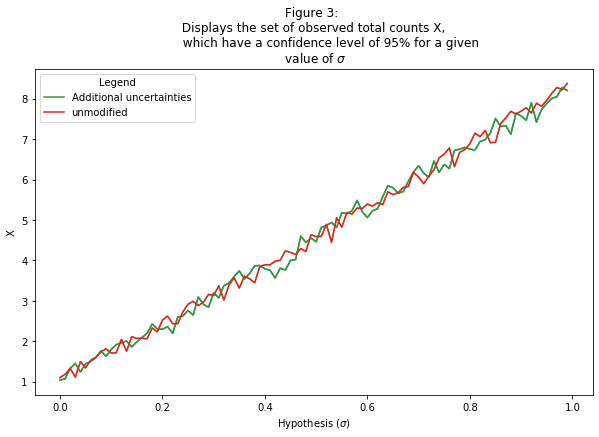

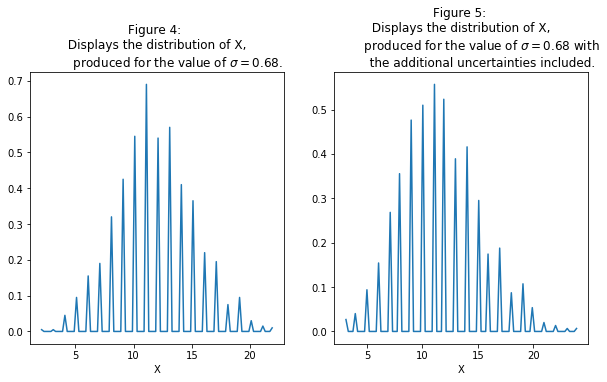

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st


def Experiment(n,h):
    """Generates a distribution of values based on randomly generated statistical
    inputs.
    Inputs: n; The number of values in a distribution, h, the value of the hypothesised
    signal cross-section.
    Returns: A list containing the distribution."""
    x_ = [] 
    for _ in range(n):  
        p_b = np.random.normal(4.8,0.5) 
        b = np.random.poisson(p_b)  
        l = 10      
        p_s = l*h   
        s = np.random.poisson(p_s)      
        x = s + b   
        x_.append(x)
    return x_

def hypothesis_tester(n):
    """Generates a range of values which conform to a 95% confidence level for a given
    cross section.
    Inputs: n; the number of times each experiment is performed.
    Returns: A dictionary containing two lists, one for the X vale with the 95% 
    confidence level and the other for the corresponding value of sigma"""
    x_fin = [] 
    h_list = []
    z = -1.65   
    for h in np.arange(0,1,0.01): 
        x_ = Experiment(n,h)
        mu_x = st.mean(x_) 
        sig_x = st.pstdev(x_)
        x_fin.append((sig_x)*z + mu_x)
        h_list.append(h)
    plots_ = {'hypothesis list': h_list, 'confidence x_list': x_fin}
    return plots_

def Experiment_plus(n,h):
    """Generates a distribution of values based on randomly generated statistical
    inputs, with an increased number of uncertainties.
    Inputs: n; The number of values in a distribution, h, the value of the hypothesised
    signal cross-section.
    Returns: A list containing the distribution."""
    x_ = [] 
    for _ in range(n):  
        p_b = np.random.normal(4.8,0.5) 
        b = np.random.poisson(p_b)  
        l = np.random.normal(10,0.5)      
        p_s = l*h   
        s = np.random.poisson(p_s)      
        x = s + b   
        p = np.random.normal(0.7,0.1) 
        if np.random.uniform(0, 1) < p :
            x_.append(x)    
    return x_

def hypothesis_tester_plus(n):
    """Generates a range of values which conform to a 95% confidence level for a given
    cross section,  with an increased number of uncertainties.
    Inputs: n; the number of times each experiment is performed.
    Returns: A dictionary containing two lists, one for the X vale with the 95% 
    confidence level and the other for the corresponding value of sigma"""
    x_fin = [] 
    h_list = []
    z = -1.65   
    for h in np.arange(0,1,0.01): 
        x_ = Experiment_plus(n,h)
        mu_x = st.mean(x_) 
        sig_x = st.pstdev(x_)
        x_fin.append((sig_x)*z + mu_x)  
        h_list.append(h)
    plots_ = {'hypothesis list': h_list, 'confidence x_list': x_fin}
    return plots_


runs = 1000

hypoth_ = hypothesis_tester(runs)
hypoth_plus = hypothesis_tester_plus(runs)

plt.figure(figsize=(10,6))       
plt.plot(hypoth_plus['hypothesis list'],hypoth_plus['confidence x_list'],label = 'plus')
plt.plot(hypoth_['hypothesis list'],hypoth_['confidence x_list'], label = 'unmodified')
one_a, = plt.plot(hypoth_plus['hypothesis list'],hypoth_plus['confidence x_list'],label = 'Additional uncertainties')
two_a, = plt.plot(hypoth_['hypothesis list'],hypoth_['confidence x_list'], label = 'unmodified')
plt.legend(handles=[one_a,two_a],title="Legend")
plt.title('Figure 3: \n Displays the set of observed total counts X, \n\
          which have a confidence level of 95% for a given \n value of $\sigma$' )
plt.ylabel('X')
plt.xlabel('Hypothesis ($\sigma$)')
plt.show


x_dist = Experiment(runs,0.68)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
hist, bins = np.histogram(x_dist, bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)
plt.title('Figure 4: \n Displays the distribution of X, \n\
           produced for the value of $\sigma = 0.68$.' )
plt.xlabel('X')
 
x_dist_plus = Experiment_plus(runs,0.68)

plt.subplot(1, 2, 2)
hist, bins = np.histogram(x_dist_plus, bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)
plt.title('Figure 5: \n Displays the distribution of X, \n\
           produced for the value of $\sigma = 0.68$ with \n\
           the additional uncertainties included.' )
plt.xlabel('X')
plt.show()

The code used in this question follows the following architecture. A set of functions describe and find solutions to the problem and then those functions are called and the results plotted and displayed accordingly. The code makes use of dictionaries in order to optimise performance and follows conventional commenting style to improve code clarity.

In order to describe the specific functionality of the algorithms used in this programme I will first describe the problem they seek to solve.

The basic premise of this exercise is that we wish to find the value of the cross section of the signal process $\sigma$, which corresponds to an observed value of counts $ X = 6$ which has a confidence level of 95%. The observed count value $X$ is generated by the sum of two processes, a signal source $S$ and a background source $B$; such that $X = S + B$. Both $S$ & $B$ are themselves generated from a poisson distribution, where the mean of each poisson distribution is itself generated from a gaussian distribution.

The basic algorithm is as follows. A range of hypothesised $\sigma$ values is produced and for each value a corresponding distribution of $X$ values is generated. Each $X$ distribution is produced by using built in gaussian and Poisson random number generators to generate an $S$ & $B$ value for each value of $\sigma$. By running the experiment a large number of times, a range of $X$ values is generated, based on the fluctuating values of $S$ & $B$. The mean and standard deviation of each $X$ distribution is then calculated and from this a single $X$ value is selected by re arranging the following equation for $X$.

$$ Z = \frac{X-\mu_{x}}{\sigma_{x}}$$

Where $\sigma_{x}$ & $\mu_{x}$ correspond to the standard deviation and mean of the $X$ distribution we seek to extract (the value with a 95% confidence level) from. $Z$ is taken from standard gaussian tables to be $Z = -1.65$, which is the value which corresponds to a p-value of 0.05, which in turn corresponds to the desired confidence level of 95%. This now gives us a one to one mapping where one value of $\sigma$ corresponds to one value of $X$.

This mapping has been plotted by two separate processes, one which includes an increased number of variable uncertainties, and is displayed in figure 3. From this we can visually ascribe our value of $X = 6$ (which has a 95% confidence level) to a value of $\sigma$ somewhere between 0.6 & 0.7. This gives us then our value of $\sigma$ which has been roughly selected to be $\sigma = 1.68$. In order to further verify this, plots 4 & 5 display the corresponding $X$ distributions which were generated from the value of $\sigma = 1.68$. It is therefore possible to see that the value of $X = 6$ for both of these distributions sits on the boundary of the 95% fraction of the distribution.

As an additional exercise, the additional uncertainties of the uncertainty on the luminosity and the efficiency to identify signal events have been included in the overlaid plot and a comparison made between the two. The additional uncertainties were modelled by simply including their respective values as randomly generated events in the same manner in which $B$ was selected. The efficiency to identify signal events was modelled by generating a probability of detection from a gaussian distribution with the required mean and standard deviation. It is quite difficult to measure the effect of including these additional uncertainties, however it is possible to see that the effect these have is to increase the fluctuation around the mean of $X$. 

